In [6]:
import seaborn as sns
import pandas as pd 
import pylab as plt
import numpy as np
import copy
import plot_functions as plotf
import bootstrap_functions as bootf
import model_functions as modelf
import read_experimental_data as e_data

np.random.seed(0)
%matplotlib inline

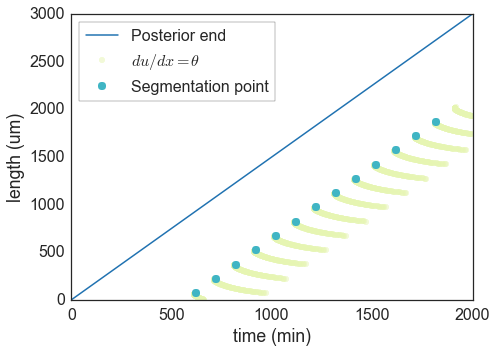

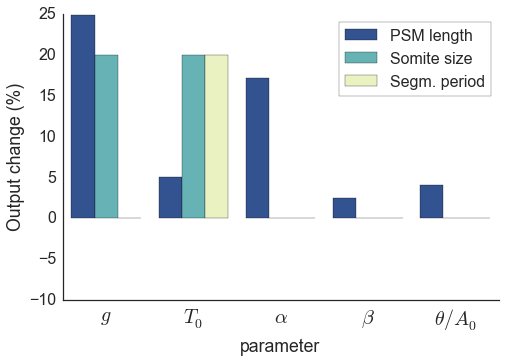

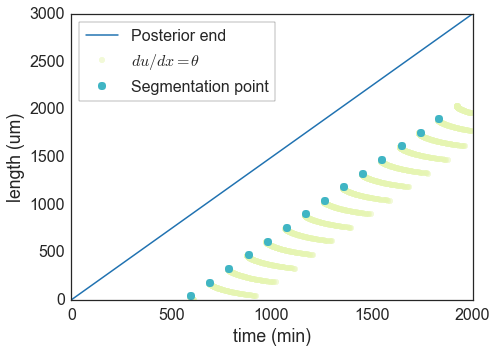

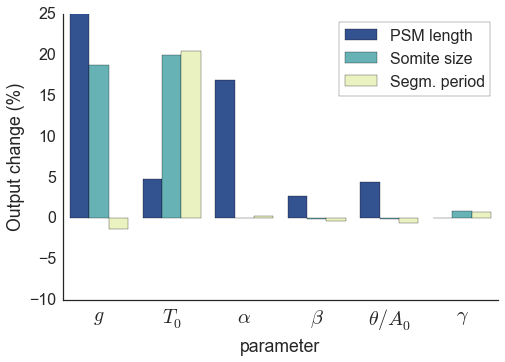

In [7]:
p = {}
p['a']  = 160.
p['b']  = 1200.
p['T0'] = 100.
p['theta'] = 1.
p['gamma'] = 1e+100

d = {}
d['t'] = np.arange(0, 2000, 1)
d['g'] = 1.5*np.ones(len(d['t']))
d['L_ef'] = d['g']*d['t']

out = plotf.segmentation_points(d, p)
l_pars = ['g', 'T0', 'a', 'b', 'theta']
xlabel = [r'$g$', r'$T_0$', r'$\alpha$', r'$\beta$', r'$\theta/A_0$']
plotf.sensitive_analysis(d, copy.copy(p), l_pars, xlabel=xlabel)

# Considering that the A and T are dependent on the growth rate
p['gamma'] = 30.
out = plotf.segmentation_points(d, p)
l_pars = ['g', 'T0', 'a', 'b', 'theta', 'gamma']
xlabel = [r'$g$', r'$T_0$', r'$\alpha$', r'$\beta$', r'$\theta/A_0$', r'$\gamma$']
plotf.sensitive_analysis(d, copy.copy(p), l_pars, xlabel=xlabel)

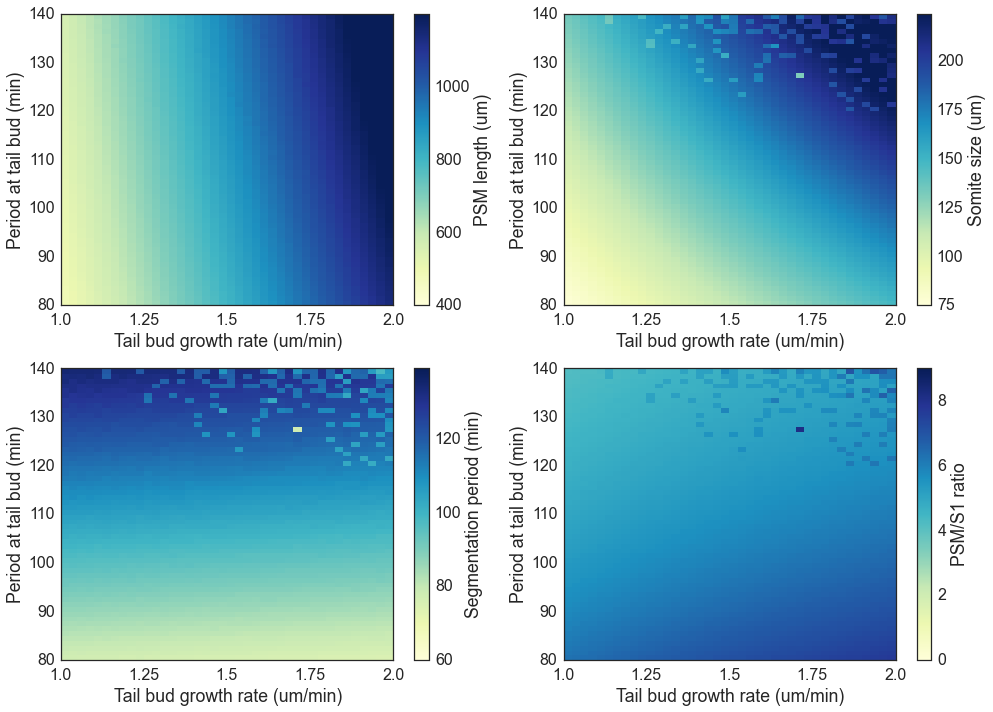

In [ ]:
ri = np.arange(1.0, 2.01, 0.025)
rj = np.arange(80, 141, 1)
crange = [np.arange(400, 1201, 200), np.arange(75, 226, 25), np.arange(60, 141, 20), np.arange(0, 11, 2)]
plotf.phaseDiagram_gxT0(d, p, ri, rj, crange)

In [ ]:
d['t'] = np.arange(0, 5000, 1)
d['g'] = 1.5*np.ones(len(d['t']))
d['L_ef'] = d['g']*d['t']

ri = np.arange(0.5, 1.51, 0.025)
rj = np.arange(30, 121, 1)
crange = [np.arange(0, 1201, 200), np.arange(0, 151, 50), np.arange(20, 141, 20), np.arange(0, 31, 10)]
plotf.phaseDiagram_gxT0(d, p, ri, rj, crange, inter_species=True)

In [ ]:
x  = np.log(np.array([0.50, 1.00, 1.50]))
y  = np.log(np.array([35.0, 12.0,  7.0]))
xr = np.log(np.linspace(0.4, 1.6, 51))

pfit = np.polyfit(x, y, 1)
ynew = np.polyval(pfit, xr)    

cmap = plt.cm.YlGnBu
f = plt.subplots(1, 1, figsize=(7, 5), sharey=False)
ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
plt.plot(np.exp(x), np.exp(y), 'o', ms=16, c=cmap(0.45), alpha=0.8)
plt.plot(np.exp(xr), np.exp(pfit[1]  + pfit[0]*(xr)), c=cmap(0.8))
plt.ylabel('PSM to somite size ratio (P/s)')
plt.xlabel(r'Tail bud growth rate ($g$) ($\mu$/min)')
plt.yticks(np.arange(0, 41, 10))
plt.xticks(np.arange(0.5, 1.51, 0.25))
# plt.savefig('../figures/ConstantGrowth_PSMsomiteRatioxg.pdf', format='pdf')
print pfit